In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load the Excel file
file_path = 'Assignment 3 - timeseries_data.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')
data.head()

,DATETIME,HB_NORTH (RTLMP),ERCOT (WIND_RTI),ERCOT (GENERATION_SOLAR_RT),ERCOT (RTLOAD),HOURENDING,MARKETDAY,PEAKTYPE,MONTH,YEAR
0,2017-01-01 01:00:00,23.3575,2155.31,0.0,29485.791355,1,2017-01-01,OFFPEAK,JANUARY,2017
1,2017-01-01 02:00:00,21.4650,2313.81,0.0,28911.565913,2,2017-01-01,OFFPEAK,JANUARY,2017
2,2017-01-01 03:00:00,20.7350,2587.68,0.0,28238.258175,3,2017-01-01,OFFPEAK,JANUARY,2017
3,2017-01-01 04:00:00,20.2700,2748.65,0.0,27821.000513,4,2017-01-01,OFFPEAK,JANUARY,2017
4,2017-01-01 05:00:00,20.1200,2757.49,0.0,27646.942413,5,2017-01-01,OFFPEAK,JANUARY,2017


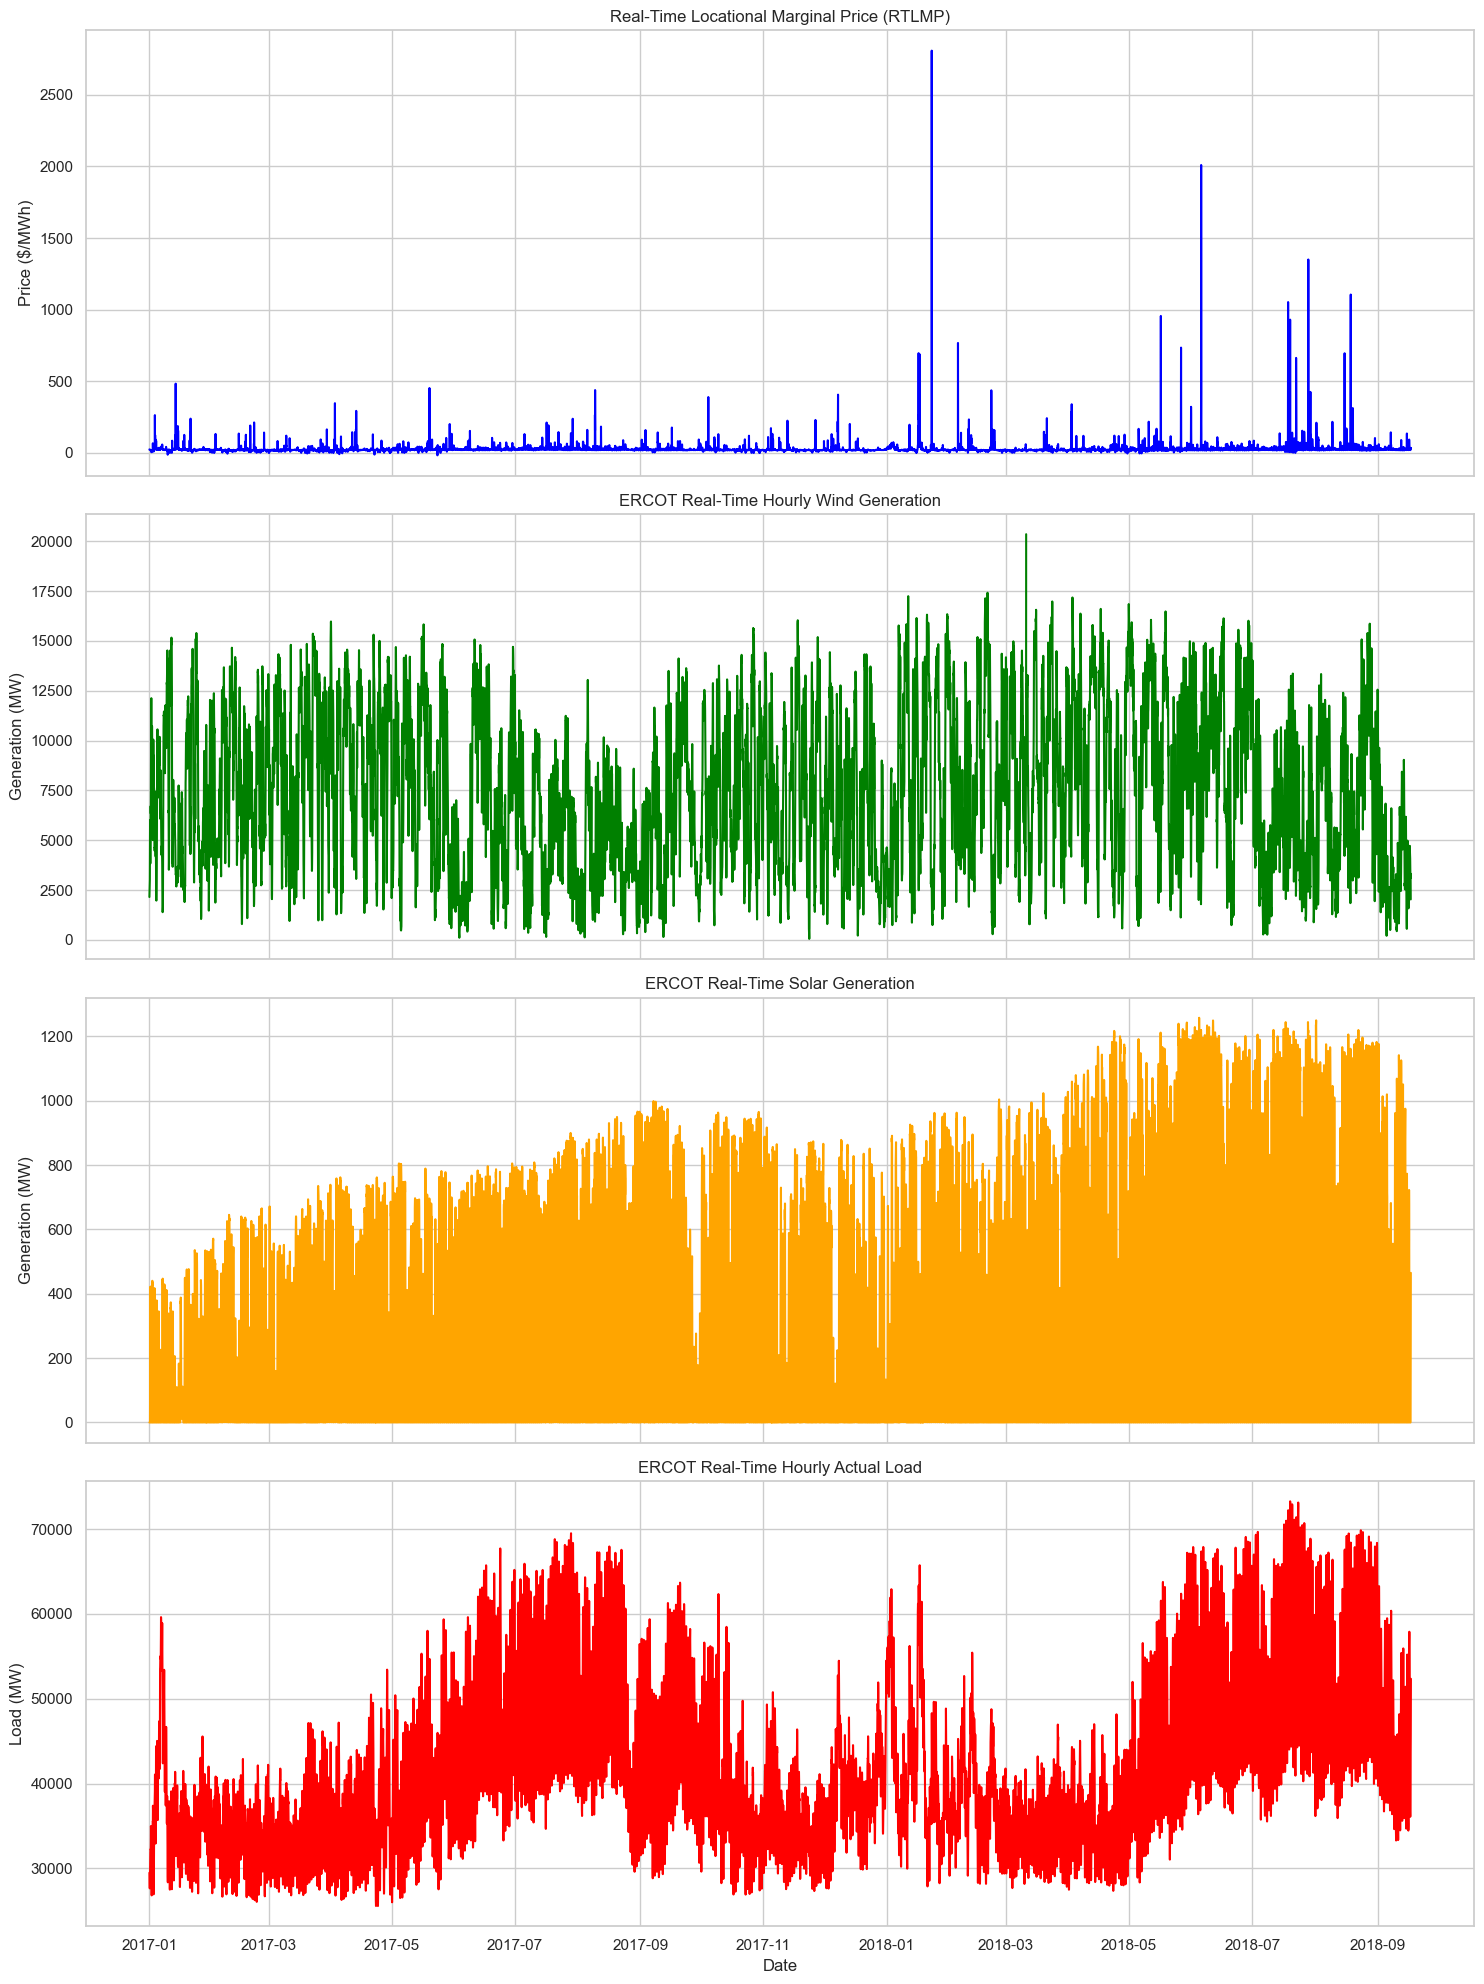

In [61]:
# Set the style of seaborn plot
sns.set(style="whitegrid")

# Creating time series plot for key variables
fig, axs = plt.subplots(4, 1, figsize=(15, 20), sharex=True)

# Plot for RTLMP
axs[0].plot(data['DATETIME'], data['HB_NORTH (RTLMP)'], label='RTLMP', color='blue')
axs[0].set_title('Real-Time Locational Marginal Price (RTLMP)')
axs[0].set_ylabel('Price ($/MWh)')

# Plot for Wind Generation
axs[1].plot(data['DATETIME'], data['ERCOT (WIND_RTI)'], label='Wind Generation', color='green')
axs[1].set_title('ERCOT Real-Time Hourly Wind Generation')
axs[1].set_ylabel('Generation (MW)')

# Plot for Solar Generation
axs[2].plot(data['DATETIME'], data['ERCOT (GENERATION_SOLAR_RT)'], label='Solar Generation', color='orange')
axs[2].set_title('ERCOT Real-Time Solar Generation')
axs[2].set_ylabel('Generation (MW)')

# Plot for RTLoad
axs[3].plot(data['DATETIME'], data['ERCOT (RTLOAD)'], label='RTLoad', color='red')
axs[3].set_title('ERCOT Real-Time Hourly Actual Load')
axs[3].set_ylabel('Load (MW)')

# Set the xlabel
axs[3].set_xlabel('Date')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## RTLMP (Price): Shows variability over time, with some spikes that could be due to demand changes, generation costs, or other factors.
## Wind Generation: Appears to fluctuate significantly, possibly influenced by weather conditions.
## Solar Generation: Very low during night hours (as expected) and peaks during daylight, showing clear diurnal patterns.
## RTLoad (Actual Load): Generally follows a predictable pattern but with variations that could correlate with temperature, time of year, or economic activity.

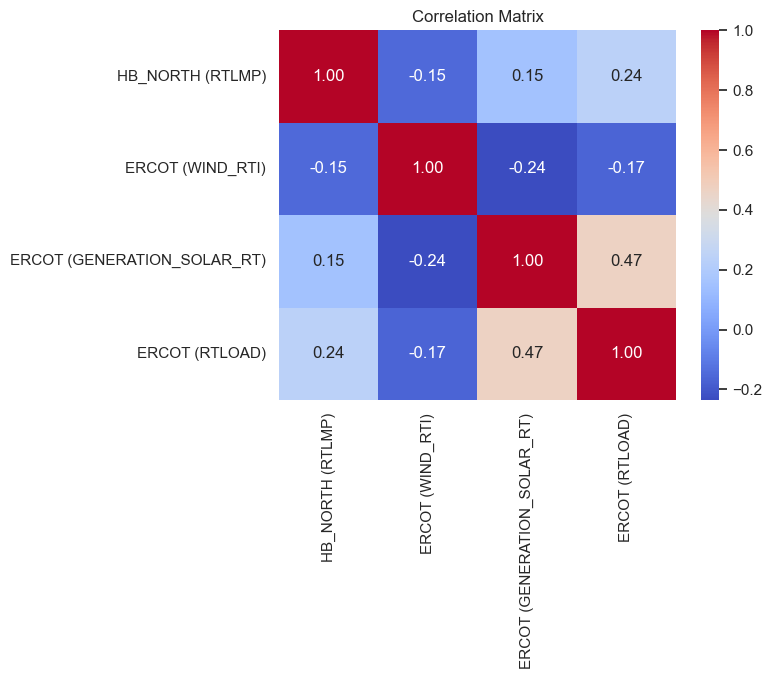

In [63]:
# Correlation Matrix
corr_matrix = data[['HB_NORTH (RTLMP)', 'ERCOT (WIND_RTI)', 'ERCOT (GENERATION_SOLAR_RT)', 'ERCOT (RTLOAD)']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## There's a moderate negative correlation between RTLMP and Wind Generation, suggesting that increased wind generation could lead to lower prices.
## Solar Generation has a very weak correlation with RTLMP, indicating its current impact on price might be minimal.
## RTLoad shows a mild positive correlation with RTLMP, which is expected as higher demand can drive up prices.

In [25]:
# Fill missing values using forward fill method
data_filled = data.fillna(method='ffill')

# Recheck for any remaining missing values
remaining_missing = data_filled.isnull().sum()
remaining_missing[remaining_missing > 0], data_filled.head()

(Series([], dtype: int64),
              DATETIME  HB_NORTH (RTLMP)  ERCOT (WIND_RTI)  \
 0 2017-01-01 01:00:00           23.3575           2155.31   
 1 2017-01-01 02:00:00           21.4650           2313.81   
 2 2017-01-01 03:00:00           20.7350           2587.68   
 3 2017-01-01 04:00:00           20.2700           2748.65   
 4 2017-01-01 05:00:00           20.1200           2757.49   
 
    ERCOT (GENERATION_SOLAR_RT)  ERCOT (RTLOAD)  HOURENDING  MARKETDAY  \
 0                          0.0    29485.791355           1 2017-01-01   
 1                          0.0    28911.565913           2 2017-01-01   
 2                          0.0    28238.258175           3 2017-01-01   
 3                          0.0    27821.000513           4 2017-01-01   
 4                          0.0    27646.942413           5 2017-01-01   
 
   PEAKTYPE    MONTH  YEAR  
 0  OFFPEAK  JANUARY  2017  
 1  OFFPEAK  JANUARY  2017  
 2  OFFPEAK  JANUARY  2017  
 3  OFFPEAK  JANUARY  2017  
 4  OFFP

In [27]:
# Define a function to calculate IQR and identify outliers
def detect_outliers(data, columns):
    outlier_indices = {}
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_indices[column] = outliers.index.tolist()
    return outlier_indices

# Columns to check for outliers
columns_to_check = ['HB_NORTH (RTLMP)', 'ERCOT (WIND_RTI)', 'ERCOT (GENERATION_SOLAR_RT)']

# Detecting outliers
outliers_indices = detect_outliers(data_filled, columns_to_check)

# Counting the number of outliers in each column and display examples of outliers
outlier_counts = {col: len(indices) for col, indices in outliers_indices.items()}
outlier_examples = {col: data_filled.loc[indices].head() for col, indices in outliers_indices.items() if indices}

outlier_counts, outlier_examples['HB_NORTH (RTLMP)'] if 'HB_NORTH (RTLMP)' in outlier_examples else "No outliers"

({'HB_NORTH (RTLMP)': 1583,
  'ERCOT (WIND_RTI)': 0,
  'ERCOT (GENERATION_SOLAR_RT)': 0},
               DATETIME  HB_NORTH (RTLMP)  ERCOT (WIND_RTI)  \
 23 2017-01-02 00:00:00            6.1575          12125.88   
 27 2017-01-02 04:00:00            3.8500           9420.92   
 41 2017-01-02 18:00:00           66.3325           5009.93   
 65 2017-01-03 18:00:00          262.8800           4612.96   
 66 2017-01-03 19:00:00           51.8650           5679.25   
 
     ERCOT (GENERATION_SOLAR_RT)  ERCOT (RTLOAD)  HOURENDING  MARKETDAY  \
 23                         0.00    30308.436788          24 2017-01-01   
 27                         0.00    26819.410683           4 2017-01-02   
 41                        35.40    35669.102045          18 2017-01-02   
 65                        36.90    39083.297993          18 2017-01-03   
 66                         0.06    41063.278853          19 2017-01-03   
 
    PEAKTYPE    MONTH  YEAR  
 23  OFFPEAK  JANUARY  2017  
 27  OFFPEAK  JANU

In [35]:
# Create time features
data_filled['Hour'] = data_filled['DATETIME'].dt.hour
data_filled['DayOfWeek'] = data_filled['DATETIME'].dt.dayofweek
data_filled['Month'] = data_filled['DATETIME'].dt.month

# Create lagged features for 24 hours
for lag in range(1, 25):
    data_filled[f'RTLMP_lag{lag}'] = data_filled['HB_NORTH (RTLMP)'].shift(lag)
    data_filled[f'WindGen_lag{lag}'] = data_filled['ERCOT (WIND_RTI)'].shift(lag)
    data_filled[f'SolarGen_lag{lag}'] = data_filled['ERCOT (GENERATION_SOLAR_RT)'].shift(lag)

# Create rolling window statistics
rolling_cols = ['HB_NORTH (RTLMP)', 'ERCOT (WIND_RTI)', 'ERCOT (GENERATION_SOLAR_RT)']
for col in rolling_cols:
    data_filled[f'{col}_rolling_mean_24h'] = data_filled[col].rolling(window=24).mean()
    data_filled[f'{col}_rolling_std_24h'] = data_filled[col].rolling(window=24).std()

# Display the first few rows of the updated dataframe to check the new features
data_filled[['DATETIME', 'HB_NORTH (RTLMP)', 'RTLMP_lag1', 'WindGen_lag1', 'SolarGen_lag1', 'Hour', 'DayOfWeek', 'Month']].head()

,DATETIME,HB_NORTH (RTLMP),RTLMP_lag1,WindGen_lag1,SolarGen_lag1,Hour,DayOfWeek,Month
0,2017-01-01 01:00:00,23.3575,NaN,NaN,NaN,1,6,1
1,2017-01-01 02:00:00,21.4650,23.3575,2155.31,0.0,2,6,1
2,2017-01-01 03:00:00,20.7350,21.4650,2313.81,0.0,3,6,1
3,2017-01-01 04:00:00,20.2700,20.7350,2587.68,0.0,4,6,1
4,2017-01-01 05:00:00,20.1200,20.2700,2748.65,0.0,5,6,1


In [33]:
# Remove the first 24 rows to handle missing values from lagged and rolling features
cleaned_data = data_filled.dropna()

# Recheck for any remaining missing values
remaining_missing_after_clean = cleaned_data.isnull().sum()
remaining_missing_after_clean[remaining_missing_after_clean > 0], cleaned_data.head()

(Series([], dtype: int64),
               DATETIME  HB_NORTH (RTLMP)  ERCOT (WIND_RTI)  \
 24 2017-01-02 01:00:00           17.5250           9976.66   
 25 2017-01-02 02:00:00           16.7950           8967.75   
 26 2017-01-02 03:00:00           16.9100           8467.31   
 27 2017-01-02 04:00:00            3.8500           9420.92   
 28 2017-01-02 05:00:00            9.8875          10247.52   
 
     ERCOT (GENERATION_SOLAR_RT)  ERCOT (RTLOAD)  HOURENDING  MARKETDAY  \
 24                          0.0    28720.562190           1 2017-01-02   
 25                          0.0    27588.635490           2 2017-01-02   
 26                          0.0    26984.946140           3 2017-01-02   
 27                          0.0    26819.410683           4 2017-01-02   
 28                          0.0    27050.314810           5 2017-01-02   
 
    PEAKTYPE    MONTH  YEAR  ...  SolarGen_lag23  RTLMP_lag24  WindGen_lag24  \
 24  OFFPEAK  JANUARY  2017  ...             0.0      23.3575

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [39]:
# Selecting features and target for the model
features = cleaned_data.drop(['DATETIME', 'HB_NORTH (RTLMP)', 'MARKETDAY', 'PEAKTYPE', 'MONTH', 'YEAR'], axis=1)
target = cleaned_data['HB_NORTH (RTLMP)']

# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Reshape features for LSTM [samples, time steps, features]
# Here, time steps = 1 as we are using feature engineering to capture time dependencies
X = scaled_features.reshape((scaled_features.shape[0], 1, scaled_features.shape[1]))
y = target.values

# Splitting data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train.shape, X_val.shape

((11970, 1, 85), (2993, 1, 85))

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

2024-05-23 22:56:04.014571: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [53]:
# Define the LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(100, return_sequences=True),
    Dropout(0.3),
    LSTM(100),
    Dropout(0.3),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_val, y_val), verbose=2, shuffle=False)

Epoch 1/50
167/167 - 5s - loss: 1353.6990 - mean_absolute_error: 11.9227 - val_loss: 6022.6167 - val_mean_absolute_error: 15.6130 - 5s/epoch - 27ms/step
Epoch 2/50
167/167 - 1s - loss: 1218.6947 - mean_absolute_error: 7.9618 - val_loss: 5954.3286 - val_mean_absolute_error: 15.4085 - 683ms/epoch - 4ms/step
Epoch 3/50
167/167 - 1s - loss: 1214.8468 - mean_absolute_error: 8.4917 - val_loss: 5940.7295 - val_mean_absolute_error: 15.4333 - 673ms/epoch - 4ms/step
Epoch 4/50
167/167 - 1s - loss: 1214.3228 - mean_absolute_error: 8.6431 - val_loss: 5938.1396 - val_mean_absolute_error: 15.4411 - 674ms/epoch - 4ms/step
Epoch 5/50
167/167 - 1s - loss: 1214.9700 - mean_absolute_error: 8.6812 - val_loss: 5937.5591 - val_mean_absolute_error: 15.4430 - 672ms/epoch - 4ms/step
Epoch 6/50
167/167 - 1s - loss: 1213.8966 - mean_absolute_error: 8.6795 - val_loss: 5937.5811 - val_mean_absolute_error: 15.4429 - 678ms/epoch - 4ms/step
Epoch 7/50
167/167 - 1s - loss: 1216.4105 - mean_absolute_error: 8.6931 - val

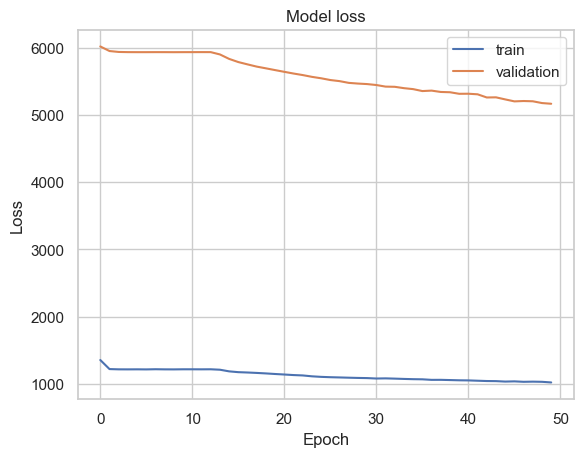

In [55]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [57]:
# Making predictions on the validation set
y_pred = model.predict(X_val)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_val, y_pred, squared=False)  # squared=False returns RMSE
print("Root Mean Squared Error (RMSE):", rmse)

94/94 [==============================] - 1s 1ms/step
Mean Absolute Error (MAE): 16.467453745016652
Root Mean Squared Error (RMSE): 71.89778144482626


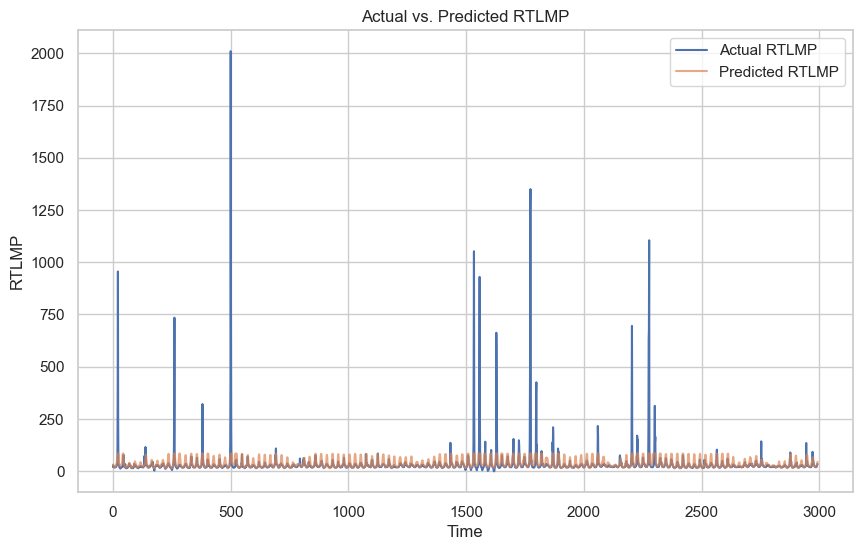

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(y_val, label='Actual RTLMP')
plt.plot(y_pred, label='Predicted RTLMP', alpha=0.7)
plt.title('Actual vs. Predicted RTLMP')
plt.xlabel('Time')
plt.ylabel('RTLMP')
plt.legend()
plt.show()